In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

8it [00:00, 79.90it/s]

17it [00:00, 82.38it/s]

26it [00:00, 84.24it/s]

35it [00:00, 85.58it/s]

44it [00:00, 86.30it/s]

53it [00:00, 87.25it/s]

63it [00:00, 88.16it/s]

72it [00:00, 88.52it/s]

81it [00:00, 88.89it/s]

90it [00:01, 89.22it/s]

100it [00:01, 89.60it/s]

109it [00:01, 89.55it/s]

118it [00:01, 89.56it/s]

127it [00:01, 89.66it/s]

136it [00:01, 89.35it/s]

145it [00:01, 89.41it/s]

155it [00:01, 89.56it/s]

164it [00:01, 89.26it/s]

173it [00:01, 88.94it/s]

182it [00:02, 89.05it/s]

191it [00:02, 89.29it/s]

201it [00:02, 89.57it/s]

210it [00:02, 89.39it/s]

219it [00:02, 89.40it/s]

229it [00:02, 89.64it/s]

238it [00:02, 89.38it/s]

247it [00:02, 89.38it/s]

256it [00:02, 89.23it/s]

265it [00:02, 88.84it/s]

274it [00:03, 88.73it/s]

283it [00:03, 88.80it/s]

292it [00:03, 88.57it/s]

301it [00:03, 88.65it/s]

310it [00:03, 88.90it/s]

319it [00:03, 88.98it/s]

328it [00:03, 89.05it/s]

337it [00:03, 89.06it/s]

346it [00:03, 89.00it/s]

355it [00:03, 89.28it/s]

364it [00:04, 89.48it/s]

373it [00:04, 89.59it/s]

383it [00:04, 89.40it/s]

392it [00:04, 89.45it/s]

402it [00:04, 89.74it/s]

411it [00:04, 89.61it/s]

420it [00:04, 89.61it/s]

429it [00:04, 89.17it/s]

439it [00:04, 89.46it/s]

448it [00:05, 89.53it/s]

457it [00:05, 89.32it/s]

466it [00:05, 89.29it/s]

475it [00:05, 89.45it/s]

484it [00:05, 89.59it/s]

494it [00:05, 89.80it/s]

503it [00:05, 89.51it/s]

512it [00:05, 89.51it/s]

521it [00:05, 89.38it/s]

530it [00:05, 89.51it/s]

539it [00:06, 89.49it/s]

548it [00:06, 89.56it/s]

558it [00:06, 89.68it/s]

567it [00:06, 89.36it/s]

577it [00:06, 89.58it/s]

586it [00:06, 89.44it/s]

595it [00:06, 89.31it/s]

604it [00:06, 89.26it/s]

613it [00:06, 89.42it/s]

623it [00:06, 89.46it/s]

632it [00:07, 89.39it/s]

641it [00:07, 89.21it/s]

650it [00:07, 88.31it/s]

659it [00:07, 88.12it/s]

668it [00:07, 88.32it/s]

677it [00:07, 88.22it/s]

686it [00:07, 88.20it/s]

695it [00:07, 88.43it/s]

704it [00:07, 88.26it/s]

713it [00:08, 88.49it/s]

723it [00:08, 88.89it/s]

732it [00:08, 88.90it/s]

741it [00:08, 89.04it/s]

750it [00:08, 88.98it/s]

759it [00:08, 89.12it/s]

768it [00:08, 89.01it/s]

777it [00:08, 89.15it/s]

786it [00:08, 89.33it/s]

796it [00:08, 89.55it/s]

805it [00:09, 89.40it/s]

815it [00:09, 89.74it/s]

824it [00:09, 89.20it/s]

834it [00:09, 89.48it/s]

843it [00:09, 89.42it/s]

853it [00:09, 89.66it/s]

862it [00:09, 89.56it/s]

871it [00:09, 89.39it/s]

880it [00:09, 88.91it/s]

890it [00:09, 89.18it/s]

899it [00:10, 88.53it/s]

908it [00:10, 88.82it/s]

917it [00:10, 88.95it/s]

926it [00:10, 89.23it/s]

935it [00:10, 87.99it/s]

944it [00:10, 88.49it/s]

954it [00:10, 89.06it/s]

963it [00:10, 88.83it/s]

972it [00:10, 88.81it/s]

981it [00:11, 88.90it/s]

991it [00:11, 89.31it/s]

1000it [00:11, 89.22it/s]

1009it [00:11, 89.40it/s]

1018it [00:11, 89.47it/s]

1027it [00:11, 89.52it/s]

1037it [00:11, 89.77it/s]

1046it [00:11, 89.54it/s]

1055it [00:11, 89.63it/s]

1065it [00:11, 89.86it/s]

1074it [00:12, 89.39it/s]

1083it [00:12, 89.43it/s]

1092it [00:12, 89.45it/s]

1101it [00:12, 89.15it/s]

1110it [00:12, 88.94it/s]

1119it [00:12, 88.86it/s]

1128it [00:12, 88.09it/s]

1137it [00:12, 88.43it/s]

1146it [00:12, 87.35it/s]

1155it [00:12, 88.02it/s]

1165it [00:13, 88.76it/s]

1174it [00:13, 88.91it/s]

1183it [00:13, 89.04it/s]

1192it [00:13, 89.18it/s]

1201it [00:13, 89.36it/s]

1211it [00:13, 89.57it/s]

1220it [00:13, 89.31it/s]

1229it [00:13, 89.16it/s]

1238it [00:13, 89.39it/s]

1247it [00:13, 89.37it/s]

1256it [00:14, 89.25it/s]

1265it [00:14, 89.38it/s]

1274it [00:14, 89.50it/s]

1283it [00:14, 89.62it/s]

1292it [00:14, 89.69it/s]

1302it [00:14, 89.81it/s]

1311it [00:14, 89.58it/s]

1320it [00:14, 89.65it/s]

1330it [00:14, 89.86it/s]

1339it [00:15, 89.70it/s]

1348it [00:15, 89.71it/s]

1357it [00:15, 88.98it/s]

1366it [00:15, 89.15it/s]

1375it [00:15, 89.21it/s]

1385it [00:15, 89.53it/s]

1394it [00:15, 89.25it/s]

1403it [00:15, 89.41it/s]

1413it [00:15, 89.70it/s]

1422it [00:15, 89.69it/s]

1431it [00:16, 89.24it/s]

1440it [00:16, 89.16it/s]

1449it [00:16, 89.18it/s]

1458it [00:16, 88.99it/s]

1467it [00:16, 88.92it/s]

1476it [00:16, 88.96it/s]

1485it [00:16, 88.44it/s]

1494it [00:16, 88.76it/s]

1503it [00:16, 88.72it/s]

1512it [00:16, 88.71it/s]

1521it [00:17, 88.47it/s]

1530it [00:17, 88.32it/s]

1539it [00:17, 88.51it/s]

1548it [00:17, 88.50it/s]

1557it [00:17, 88.48it/s]

1566it [00:17, 88.76it/s]

1575it [00:17, 88.97it/s]

1585it [00:17, 89.35it/s]

1594it [00:17, 89.30it/s]

1603it [00:17, 89.05it/s]

1612it [00:18, 89.11it/s]

1621it [00:18, 89.00it/s]

1630it [00:18, 88.97it/s]

1639it [00:18, 89.06it/s]

1649it [00:18, 89.37it/s]

1658it [00:18, 89.35it/s]

1667it [00:18, 89.25it/s]

1676it [00:18, 89.08it/s]

1685it [00:18, 89.22it/s]

1694it [00:19, 89.43it/s]

1703it [00:19, 89.58it/s]

1713it [00:19, 89.75it/s]

1722it [00:19, 89.51it/s]

1731it [00:19, 89.27it/s]

1741it [00:19, 89.71it/s]

1750it [00:19, 89.47it/s]

1759it [00:19, 89.43it/s]

1768it [00:19, 89.34it/s]

1777it [00:19, 89.21it/s]

1786it [00:20, 88.33it/s]

1796it [00:20, 88.86it/s]

1806it [00:20, 89.24it/s]

1815it [00:20, 88.78it/s]

1824it [00:20, 88.30it/s]

1834it [00:20, 88.87it/s]

1843it [00:20, 89.00it/s]

1853it [00:20, 89.33it/s]

1862it [00:20, 89.31it/s]

1871it [00:20, 89.27it/s]

1880it [00:21, 89.24it/s]

1889it [00:21, 89.15it/s]

1898it [00:21, 89.04it/s]

1907it [00:21, 88.95it/s]

1916it [00:21, 88.79it/s]

1925it [00:21, 88.74it/s]

1935it [00:21, 89.14it/s]

1944it [00:21, 88.85it/s]

1953it [00:21, 88.81it/s]

1962it [00:22, 88.71it/s]

1971it [00:22, 88.95it/s]

1981it [00:22, 89.34it/s]

1990it [00:22, 89.15it/s]

1999it [00:22, 89.19it/s]

2009it [00:22, 89.48it/s]

2018it [00:22, 89.34it/s]

2028it [00:22, 89.54it/s]

2037it [00:22, 89.41it/s]

2046it [00:22, 89.43it/s]

2055it [00:23, 88.94it/s]

2064it [00:23, 89.11it/s]

2073it [00:23, 88.50it/s]

2083it [00:23, 89.02it/s]

2092it [00:23, 88.83it/s]

2101it [00:23, 89.09it/s]

2111it [00:23, 89.48it/s]

2120it [00:23, 89.04it/s]

2129it [00:23, 89.14it/s]

2138it [00:23, 89.04it/s]

2147it [00:24, 88.79it/s]

2156it [00:24, 88.91it/s]

2165it [00:24, 88.79it/s]

2174it [00:24, 88.95it/s]

2183it [00:24, 88.73it/s]

2192it [00:24, 88.95it/s]

2201it [00:24, 88.87it/s]

2210it [00:24, 88.94it/s]

2219it [00:24, 88.95it/s]

2228it [00:24, 88.29it/s]

2237it [00:25, 88.70it/s]

2246it [00:25, 88.67it/s]

2255it [00:25, 88.88it/s]

2264it [00:25, 89.18it/s]

2273it [00:25, 89.40it/s]

2283it [00:25, 89.63it/s]

2292it [00:25, 89.72it/s]

2301it [00:25, 89.74it/s]

2311it [00:25, 89.94it/s]

2320it [00:26, 89.93it/s]

2329it [00:26, 89.94it/s]

2339it [00:26, 89.98it/s]

2348it [00:26, 89.47it/s]

2358it [00:26, 89.65it/s]

2367it [00:26, 89.67it/s]

2376it [00:26, 89.44it/s]

2386it [00:26, 89.71it/s]

2396it [00:26, 89.86it/s]

2405it [00:26, 89.69it/s]

2414it [00:27, 89.53it/s]

2423it [00:27, 89.58it/s]

2433it [00:27, 89.76it/s]

2442it [00:27, 89.75it/s]

2451it [00:27, 89.18it/s]

2460it [00:27, 89.07it/s]

2469it [00:27, 88.93it/s]

2479it [00:27, 89.31it/s]

2488it [00:27, 89.21it/s]

2497it [00:28, 89.05it/s]

2506it [00:28, 89.01it/s]

2515it [00:28, 87.47it/s]

2524it [00:28, 87.84it/s]

2533it [00:28, 88.47it/s]

2543it [00:28, 89.03it/s]

2552it [00:28, 89.03it/s]

2561it [00:28, 89.30it/s]

2571it [00:28, 89.59it/s]

2580it [00:28, 89.57it/s]

2590it [00:29, 89.68it/s]

2600it [00:29, 89.96it/s]

2609it [00:29, 89.42it/s]

2618it [00:29, 89.13it/s]

2627it [00:29, 89.32it/s]

2637it [00:29, 89.48it/s]

2646it [00:29, 89.21it/s]

2655it [00:29, 89.13it/s]

2664it [00:29, 89.37it/s]

2674it [00:29, 89.55it/s]

2683it [00:30, 88.09it/s]

2692it [00:30, 88.18it/s]

2701it [00:30, 88.59it/s]

2710it [00:30, 88.38it/s]

2719it [00:30, 88.41it/s]

2728it [00:30, 88.48it/s]

2738it [00:30, 88.91it/s]

2747it [00:30, 88.26it/s]

2756it [00:30, 88.71it/s]

2765it [00:31, 88.92it/s]

2775it [00:31, 89.33it/s]

2784it [00:31, 88.69it/s]

2793it [00:31, 88.92it/s]

2802it [00:31, 89.22it/s]

2812it [00:31, 89.46it/s]

2821it [00:31, 89.30it/s]

2830it [00:31, 89.44it/s]

2839it [00:31, 88.78it/s]

2848it [00:31, 88.65it/s]

2857it [00:32, 88.96it/s]

2866it [00:32, 89.15it/s]

2875it [00:32, 89.27it/s]

2884it [00:32, 89.41it/s]

2893it [00:32, 89.41it/s]

2902it [00:32, 89.25it/s]

2911it [00:32, 89.22it/s]

2920it [00:32, 89.27it/s]

2929it [00:32, 89.16it/s]

2938it [00:32, 89.16it/s]

2947it [00:33, 88.97it/s]

2956it [00:33, 88.73it/s]

2965it [00:33, 88.71it/s]

2974it [00:33, 88.81it/s]

2984it [00:33, 89.16it/s]

2993it [00:33, 88.93it/s]

3002it [00:33, 89.12it/s]

3012it [00:33, 89.59it/s]

3021it [00:33, 89.30it/s]

3031it [00:33, 89.54it/s]

3040it [00:34, 89.39it/s]

3049it [00:34, 89.28it/s]

3058it [00:34, 89.07it/s]

3067it [00:34, 88.80it/s]

3076it [00:34, 88.59it/s]

3085it [00:34, 88.95it/s]

3095it [00:34, 89.39it/s]

3104it [00:34, 89.27it/s]

3113it [00:34, 89.44it/s]

3122it [00:35, 89.58it/s]

3131it [00:35, 89.30it/s]

3140it [00:35, 88.67it/s]

3149it [00:35, 88.98it/s]

3158it [00:35, 89.16it/s]

3167it [00:35, 89.38it/s]

3176it [00:35, 89.53it/s]

3185it [00:35, 89.25it/s]

3194it [00:35, 89.41it/s]

3204it [00:35, 89.70it/s]

3213it [00:36, 89.68it/s]

3222it [00:36, 89.14it/s]

3231it [00:36, 89.26it/s]

3240it [00:36, 89.18it/s]

3249it [00:36, 88.59it/s]

3258it [00:36, 88.88it/s]

3267it [00:36, 89.20it/s]

3277it [00:36, 89.45it/s]

3286it [00:36, 89.37it/s]

3295it [00:36, 89.33it/s]

3304it [00:37, 89.18it/s]

3314it [00:37, 90.25it/s]

3324it [00:37, 90.03it/s]

3334it [00:37, 89.89it/s]

3343it [00:37, 89.69it/s]

3352it [00:37, 89.39it/s]

3361it [00:37, 89.27it/s]

3370it [00:37, 89.30it/s]

3379it [00:37, 89.24it/s]

3388it [00:37, 89.24it/s]

3397it [00:38, 89.33it/s]

3406it [00:38, 89.46it/s]

3415it [00:38, 89.52it/s]

3425it [00:38, 89.65it/s]

3434it [00:38, 88.64it/s]

3443it [00:38, 88.86it/s]

3452it [00:38, 88.89it/s]

3461it [00:38, 89.18it/s]

3470it [00:38, 89.36it/s]

3479it [00:39, 89.50it/s]

3488it [00:39, 89.50it/s]

3498it [00:39, 89.48it/s]

3507it [00:39, 89.31it/s]

3516it [00:39, 88.95it/s]

3525it [00:39, 88.86it/s]

3534it [00:39, 88.83it/s]

3543it [00:39, 89.03it/s]

3552it [00:39, 89.04it/s]

3561it [00:39, 89.28it/s]

3570it [00:40, 89.23it/s]

3579it [00:40, 88.94it/s]

3588it [00:40, 89.19it/s]

3597it [00:40, 89.38it/s]

3606it [00:40, 89.46it/s]

3616it [00:40, 89.63it/s]

3625it [00:40, 89.34it/s]

3634it [00:40, 89.24it/s]

3643it [00:40, 89.29it/s]

3653it [00:40, 89.63it/s]

3662it [00:41, 89.39it/s]

3671it [00:41, 89.54it/s]

3680it [00:41, 89.67it/s]

3690it [00:41, 89.98it/s]

3699it [00:41, 89.63it/s]

3708it [00:41, 89.20it/s]

3717it [00:41, 89.04it/s]

3726it [00:41, 88.85it/s]

3735it [00:41, 88.75it/s]

3744it [00:41, 88.66it/s]

3753it [00:42, 88.86it/s]

3763it [00:42, 89.26it/s]

3769it [00:42, 89.17it/s]


0it [00:00, ?it/s]

9it [00:00, 88.85it/s]

Number of empty sat catalogs is 0


19it [00:00, 89.38it/s]

28it [00:00, 89.33it/s]

38it [00:00, 89.60it/s]

47it [00:00, 89.56it/s]

57it [00:00, 89.99it/s]

66it [00:00, 89.85it/s]

76it [00:00, 90.18it/s]

85it [00:00, 90.08it/s]

95it [00:01, 90.32it/s]

104it [00:01, 90.05it/s]

114it [00:01, 90.19it/s]

124it [00:01, 90.21it/s]

134it [00:01, 90.33it/s]

144it [00:01, 90.29it/s]

154it [00:01, 90.27it/s]

164it [00:01, 90.34it/s]

174it [00:01, 90.61it/s]

184it [00:02, 90.89it/s]

194it [00:02, 91.04it/s]

204it [00:02, 91.01it/s]

214it [00:02, 91.05it/s]

224it [00:02, 91.32it/s]

234it [00:02, 91.61it/s]

244it [00:02, 91.01it/s]

254it [00:02, 91.07it/s]

264it [00:02, 90.91it/s]

274it [00:03, 90.48it/s]

284it [00:03, 89.79it/s]

294it [00:03, 90.01it/s]

304it [00:03, 90.13it/s]

314it [00:03, 89.98it/s]

324it [00:03, 90.07it/s]

334it [00:03, 90.16it/s]

344it [00:03, 90.08it/s]

354it [00:03, 90.17it/s]

364it [00:04, 90.25it/s]

374it [00:04, 90.58it/s]

384it [00:04, 90.73it/s]

394it [00:04, 90.92it/s]

404it [00:04, 91.40it/s]

414it [00:04, 91.22it/s]

424it [00:04, 91.10it/s]

434it [00:04, 91.19it/s]

444it [00:04, 90.77it/s]

454it [00:05, 90.65it/s]

464it [00:05, 90.57it/s]

474it [00:05, 90.41it/s]

484it [00:05, 90.39it/s]

494it [00:05, 90.30it/s]

504it [00:05, 90.46it/s]

514it [00:05, 90.36it/s]

524it [00:05, 90.38it/s]

534it [00:05, 90.31it/s]

544it [00:06, 90.07it/s]

554it [00:06, 90.11it/s]

564it [00:06, 89.46it/s]

573it [00:06, 89.46it/s]

583it [00:06, 89.63it/s]

592it [00:06, 89.69it/s]

602it [00:06, 89.93it/s]

612it [00:06, 90.10it/s]

622it [00:06, 90.10it/s]

632it [00:06, 90.23it/s]

642it [00:07, 90.11it/s]

652it [00:07, 90.00it/s]

662it [00:07, 90.23it/s]

672it [00:07, 90.29it/s]

682it [00:07, 89.92it/s]

691it [00:07, 89.18it/s]

700it [00:07, 88.14it/s]

709it [00:07, 88.60it/s]

719it [00:07, 89.09it/s]

728it [00:08, 89.21it/s]

738it [00:08, 89.52it/s]

747it [00:08, 89.22it/s]

757it [00:08, 89.67it/s]

766it [00:08, 89.57it/s]

775it [00:08, 89.52it/s]

785it [00:08, 90.41it/s]

795it [00:08, 90.60it/s]

805it [00:08, 90.64it/s]

815it [00:09, 90.81it/s]

825it [00:09, 90.96it/s]

835it [00:09, 90.80it/s]

845it [00:09, 89.53it/s]

854it [00:09, 89.54it/s]

863it [00:09, 89.67it/s]

873it [00:09, 90.07it/s]

883it [00:09, 89.87it/s]

893it [00:09, 90.10it/s]

903it [00:10, 90.01it/s]

913it [00:10, 90.13it/s]

923it [00:10, 90.45it/s]

933it [00:10, 90.61it/s]

943it [00:10, 90.85it/s]

953it [00:10, 90.89it/s]

963it [00:10, 91.10it/s]

973it [00:10, 91.14it/s]

983it [00:10, 91.23it/s]

993it [00:10, 91.14it/s]

1003it [00:11, 91.30it/s]

1013it [00:11, 91.25it/s]

1023it [00:11, 90.89it/s]

1033it [00:11, 90.91it/s]

1043it [00:11, 90.60it/s]

1053it [00:11, 90.93it/s]

1063it [00:11, 91.10it/s]

1073it [00:11, 91.37it/s]

1083it [00:11, 91.55it/s]

1093it [00:12, 91.53it/s]

1103it [00:12, 91.58it/s]

1113it [00:12, 91.50it/s]

1123it [00:12, 91.47it/s]

1133it [00:12, 91.25it/s]

1143it [00:12, 91.08it/s]

1153it [00:12, 91.13it/s]

1163it [00:12, 90.36it/s]

1173it [00:12, 90.61it/s]

1183it [00:13, 90.71it/s]

1193it [00:13, 90.99it/s]

1203it [00:13, 91.25it/s]

1213it [00:13, 91.32it/s]

1223it [00:13, 91.26it/s]

1233it [00:13, 91.15it/s]

1243it [00:13, 90.98it/s]

1253it [00:13, 90.68it/s]

1263it [00:13, 90.64it/s]

1273it [00:14, 89.92it/s]

1282it [00:14, 76.18it/s]

1292it [00:14, 80.33it/s]

1302it [00:14, 83.22it/s]

1312it [00:14, 85.25it/s]

1322it [00:14, 87.14it/s]

1332it [00:14, 88.62it/s]

1342it [00:14, 89.70it/s]

1352it [00:14, 90.37it/s]

1362it [00:15, 90.81it/s]

1372it [00:15, 90.86it/s]

1382it [00:15, 91.32it/s]

1392it [00:15, 91.58it/s]

1402it [00:15, 91.49it/s]

1412it [00:15, 91.47it/s]

1422it [00:15, 91.66it/s]

1432it [00:15, 91.59it/s]

1442it [00:15, 91.37it/s]

1452it [00:16, 90.79it/s]

1462it [00:16, 90.79it/s]

1472it [00:16, 90.46it/s]

1482it [00:16, 90.71it/s]

1492it [00:16, 91.05it/s]

1502it [00:16, 91.41it/s]

1512it [00:16, 91.63it/s]

1522it [00:16, 91.65it/s]

1532it [00:16, 91.59it/s]

1542it [00:17, 91.76it/s]

1552it [00:17, 91.66it/s]

1562it [00:17, 91.43it/s]

1572it [00:17, 91.35it/s]

1582it [00:17, 91.03it/s]

1592it [00:17, 91.04it/s]

1602it [00:17, 90.02it/s]

1612it [00:17, 89.68it/s]

1622it [00:17, 90.11it/s]

1632it [00:18, 90.09it/s]

1642it [00:18, 90.40it/s]

1652it [00:18, 90.68it/s]

1662it [00:18, 91.04it/s]

1672it [00:18, 91.38it/s]

1682it [00:18, 91.49it/s]

1692it [00:18, 91.38it/s]

1702it [00:18, 91.44it/s]

1712it [00:18, 91.55it/s]

1722it [00:19, 91.19it/s]

1732it [00:19, 91.06it/s]

1742it [00:19, 90.68it/s]

1752it [00:19, 90.83it/s]

1762it [00:19, 90.82it/s]

1772it [00:19, 90.79it/s]

1782it [00:19, 90.87it/s]

1792it [00:19, 91.12it/s]

1802it [00:19, 91.28it/s]

1812it [00:20, 91.22it/s]

1822it [00:20, 91.03it/s]

1832it [00:20, 90.45it/s]

1842it [00:20, 90.35it/s]

1852it [00:20, 90.27it/s]

1862it [00:20, 90.01it/s]

1872it [00:20, 90.16it/s]

1882it [00:20, 90.09it/s]

1892it [00:20, 90.11it/s]

1902it [00:21, 90.11it/s]

1912it [00:21, 90.35it/s]

1922it [00:21, 90.53it/s]

1932it [00:21, 90.82it/s]

1942it [00:21, 91.05it/s]

1952it [00:21, 90.11it/s]

1962it [00:21, 89.58it/s]

1971it [00:21, 89.03it/s]

1980it [00:21, 89.12it/s]

1990it [00:22, 89.73it/s]

2000it [00:22, 90.26it/s]

2010it [00:22, 90.17it/s]

2020it [00:22, 90.62it/s]

2030it [00:22, 90.73it/s]

2040it [00:22, 90.59it/s]

2050it [00:22, 89.81it/s]

2059it [00:22, 89.27it/s]

2068it [00:22, 88.83it/s]

2077it [00:22, 88.72it/s]

2086it [00:23, 88.83it/s]

2096it [00:23, 89.30it/s]

2106it [00:23, 89.81it/s]

2115it [00:23, 89.85it/s]

2125it [00:23, 90.32it/s]

2135it [00:23, 90.72it/s]

2145it [00:23, 90.75it/s]

2155it [00:23, 90.69it/s]

2165it [00:23, 90.83it/s]

2175it [00:24, 90.87it/s]

2185it [00:24, 90.76it/s]

2195it [00:24, 90.77it/s]

2205it [00:24, 90.76it/s]

2215it [00:24, 90.67it/s]

2225it [00:24, 90.59it/s]

2235it [00:24, 90.79it/s]

2245it [00:24, 91.19it/s]

2255it [00:24, 91.54it/s]

2265it [00:25, 91.61it/s]

2275it [00:25, 91.76it/s]

2285it [00:25, 91.98it/s]

2295it [00:25, 91.85it/s]

2305it [00:25, 91.46it/s]

2315it [00:25, 91.25it/s]

2325it [00:25, 91.13it/s]

2335it [00:25, 90.51it/s]

2345it [00:25, 90.70it/s]

2355it [00:26, 90.93it/s]

2365it [00:26, 91.18it/s]

2375it [00:26, 91.37it/s]

2385it [00:26, 91.13it/s]

2395it [00:26, 91.30it/s]

2405it [00:26, 91.25it/s]

2415it [00:26, 91.37it/s]

2425it [00:26, 91.12it/s]

2435it [00:26, 90.15it/s]

2445it [00:27, 90.48it/s]

2455it [00:27, 90.82it/s]

2465it [00:27, 90.11it/s]

2475it [00:27, 89.76it/s]

2484it [00:27, 89.75it/s]

2493it [00:27, 89.77it/s]

2502it [00:27, 89.76it/s]

2511it [00:27, 89.16it/s]

2520it [00:27, 89.23it/s]

2530it [00:27, 89.56it/s]

2540it [00:28, 89.84it/s]

2550it [00:28, 90.17it/s]

2560it [00:28, 90.67it/s]

2570it [00:28, 90.92it/s]

2580it [00:28, 90.95it/s]

2590it [00:28, 90.98it/s]

2600it [00:28, 90.89it/s]

2610it [00:28, 90.24it/s]

2620it [00:28, 90.14it/s]

2630it [00:29, 89.90it/s]

2639it [00:29, 89.42it/s]

2648it [00:29, 89.45it/s]

2657it [00:29, 89.56it/s]

2666it [00:29, 89.51it/s]

2675it [00:29, 89.40it/s]

2684it [00:29, 89.06it/s]

2694it [00:29, 89.56it/s]

2704it [00:29, 89.89it/s]

2714it [00:30, 90.21it/s]

2724it [00:30, 90.57it/s]

2734it [00:30, 90.60it/s]

2744it [00:30, 90.78it/s]

2754it [00:30, 90.76it/s]

2764it [00:30, 90.83it/s]

2774it [00:30, 90.82it/s]

2784it [00:30, 90.67it/s]

2794it [00:30, 91.00it/s]

2804it [00:31, 91.05it/s]

2814it [00:31, 91.20it/s]

2824it [00:31, 90.90it/s]

2834it [00:31, 91.01it/s]

2844it [00:31, 90.87it/s]

2854it [00:31, 90.69it/s]

2864it [00:31, 90.82it/s]

2874it [00:31, 90.92it/s]

2884it [00:31, 91.38it/s]

2894it [00:32, 91.33it/s]

2904it [00:32, 91.16it/s]

2914it [00:32, 91.36it/s]

2924it [00:32, 91.45it/s]

2934it [00:32, 91.72it/s]

2944it [00:32, 91.44it/s]

2954it [00:32, 91.51it/s]

2964it [00:32, 91.26it/s]

2974it [00:32, 90.44it/s]

2984it [00:32, 89.98it/s]

2993it [00:33, 89.83it/s]

3002it [00:33, 89.75it/s]

3011it [00:33, 89.49it/s]

3020it [00:33, 89.50it/s]

3029it [00:33, 89.34it/s]

3038it [00:33, 89.22it/s]

3047it [00:33, 89.38it/s]

3056it [00:33, 89.44it/s]

3065it [00:33, 89.20it/s]

3074it [00:34, 89.25it/s]

3083it [00:34, 89.09it/s]

3092it [00:34, 89.26it/s]

3101it [00:34, 89.12it/s]

3110it [00:34, 89.34it/s]

3119it [00:34, 89.20it/s]

3128it [00:34, 89.12it/s]

3137it [00:34, 89.10it/s]

3146it [00:34, 88.88it/s]

3155it [00:34, 88.71it/s]

3164it [00:35, 88.96it/s]

3173it [00:35, 89.07it/s]

3182it [00:35, 89.01it/s]

3192it [00:35, 89.56it/s]

3202it [00:35, 90.00it/s]

3212it [00:35, 90.41it/s]

3222it [00:35, 90.75it/s]

3232it [00:35, 90.89it/s]

3242it [00:35, 91.14it/s]

3252it [00:35, 91.49it/s]

3262it [00:36, 91.06it/s]

3272it [00:36, 91.10it/s]

3282it [00:36, 90.99it/s]

3292it [00:36, 91.24it/s]

3302it [00:36, 91.39it/s]

3312it [00:36, 91.56it/s]

3322it [00:36, 91.60it/s]

3332it [00:36, 91.31it/s]

3342it [00:36, 91.47it/s]

3352it [00:37, 91.12it/s]

3362it [00:37, 91.04it/s]

3372it [00:37, 91.17it/s]

3382it [00:37, 91.12it/s]

3392it [00:37, 91.27it/s]

3402it [00:37, 91.12it/s]

3412it [00:37, 90.85it/s]

3422it [00:37, 90.75it/s]

3432it [00:37, 89.95it/s]

3442it [00:38, 90.06it/s]

3452it [00:38, 90.47it/s]

3462it [00:38, 90.85it/s]

3472it [00:38, 91.18it/s]

3482it [00:38, 91.70it/s]

3492it [00:38, 91.80it/s]

3502it [00:38, 91.38it/s]

3512it [00:38, 91.10it/s]

3522it [00:38, 91.05it/s]

3532it [00:39, 91.02it/s]

3542it [00:39, 91.24it/s]

3552it [00:39, 91.48it/s]

3562it [00:39, 91.65it/s]

3572it [00:39, 91.76it/s]

3582it [00:39, 91.89it/s]

3592it [00:39, 91.94it/s]

3602it [00:39, 92.00it/s]

3612it [00:39, 92.09it/s]

3622it [00:40, 92.09it/s]

3632it [00:40, 92.18it/s]

3642it [00:40, 92.23it/s]

3652it [00:40, 91.75it/s]

3662it [00:40, 91.69it/s]

3672it [00:40, 91.71it/s]

3682it [00:40, 91.84it/s]

3692it [00:40, 91.61it/s]

3702it [00:40, 91.59it/s]

3712it [00:41, 91.68it/s]

3722it [00:41, 91.77it/s]

3732it [00:41, 91.73it/s]

3742it [00:41, 91.77it/s]

3752it [00:41, 91.88it/s]

3762it [00:41, 92.09it/s]

3769it [00:41, 90.51it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

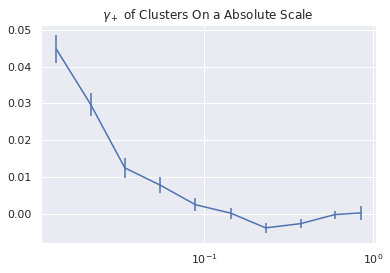

Aggregated xi:
[-30.3899 -42.7478 -28.3401 -28.8934 -14.8435  -1.0505  56.7242  53.2142
   5.7698  -1.2581]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -2936.8047  -5563.4936  -7719.8638 -10879.993  -14893.7228 -19165.0484
 -21385.7942 -19212.5842 -10788.648   -1082.0708]
------------------------------------------------------------------------------
Aggregated npairs:
[  679.  1444.  2278.  3749.  6147.  9882. 14611. 19467. 20772.  6531.]
------------------------------------------------------------------------------
Mean xi:
[-0.0448 -0.0296 -0.0124 -0.0077 -0.0024 -0.0001  0.0039  0.0027  0.0003
 -0.0002]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3252 -3.8528 -3.3889 -2.9021 -2.4229 -1.9394 -1.4637 -0.9869 -0.5194
 -0.1657]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

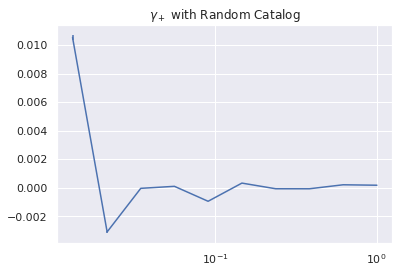

[ 1.0530e-02 -3.0813e-03 -3.2829e-05  1.0766e-04 -9.3823e-04  3.3370e-04
 -6.2208e-05 -6.3558e-05  2.1622e-04  1.8498e-04]
[-1.7151e-04  5.0191e-05  5.3475e-07 -1.7537e-06  1.5283e-05 -5.4356e-06
  1.0133e-06  1.0353e-06 -3.5220e-06 -3.0130e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

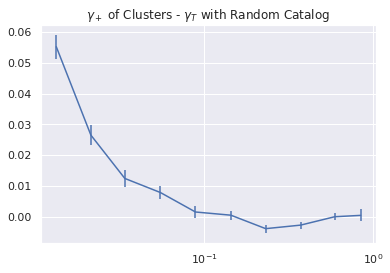

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

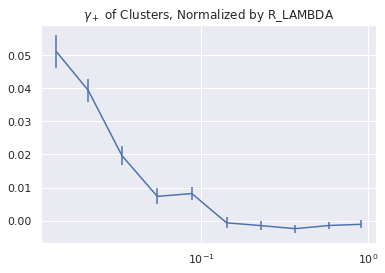

Aggregated xi:
[-19.15   -39.3065 -37.1948 -21.3965 -39.0464   5.3848  18.8124  42.2339
  31.6305  19.1888]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1607.5883  -3846.3817  -6411.3704  -8511.6732 -11610.8687 -15219.4001
 -17895.9132 -17140.5786 -11236.8978  -1688.9721]
------------------------------------------------------------------------------
Aggregated npairs:
[  374.   997.  1889.  2929.  4780.  7802. 12127. 17083. 21095. 16587.]
------------------------------------------------------------------------------
Mean xi:
[-0.0512 -0.0394 -0.0197 -0.0073 -0.0082  0.0007  0.0016  0.0025  0.0015
  0.0012]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.2984 -3.858  -3.3941 -2.906  -2.4291 -1.9507 -1.4757 -1.0034 -0.5327
 -0.1018]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)